In [1]:
try: import clmm
except:
    import notebook_install
    notebook_install.install_clmm_pipeline(upgrade=False)
    import clmm
import matplotlib.pyplot as plt
import numpy as np
from astropy import units
plt.rcParams['font.family']=['gothambook','gotham','gotham-book','serif']

clmm.__version__


/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/theory/__init__.py:35: UserWarning: CLMM Backend requested `ccl' is not available, trying others...
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/theory/__init__.py:45: UserWarning: * NumCosmo BACKEND also not available
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/theory/__init__.py:42: UserWarning: * USING cluster_toolkit+astropy BACKEND


'0.9.3'

In [2]:
import clmm.dataops as da
import clmm.galaxycluster as gc
import clmm.theory as theory
from clmm import Cosmology


In [3]:
from clmm.support import mock_data as mock


In [4]:
np.random.seed(11)


In [5]:
cosmo = Cosmology(H0 = 70.0, Omega_dm0 = 0.27 - 0.045, Omega_b0 = 0.045, Omega_k0 = 0.0)


In [6]:
import random
cluster_m = random.randint(10,100) # Masse grenzen für den Cluster
logm = np.log(cluster_m)/np.log(10)
concentration = random.randint(1,100)
cluster_ra = 0.
cluster_dec = 0.
cluster_z = random.uniform(0.1,0.6)
ngals = random.randint(50,100000) 
cluster_1 = cluster_m, concentration, cluster_ra, cluster_dec, cluster_z, ngals
print(cluster_m)
print(concentration)
print(cluster_z)
print(ngals)
print(cluster_1)

10
99
0.41918800643141774
6506
(10, 99, 0.0, 0.0, 0.41918800643141774, 6506)


In [7]:
import random
random.seed(22) #gibt einem immer die gleichen zufälligen zahlen
import numpy as np
np.set_printoptions(precision=3)   
num = 5
cluster_data = np.zeros((num,6))
for k in range(num):
    cluster_data[k][0] = np.random.randint(10,100) #masse
    cluster_data[k][1] = np.random.randint(1,100)
    cluster_data[k][2] = 0
    cluster_data[k][3] = 0
    cluster_data[k][4] = np.random.uniform(0.1,0.6)
    cluster_data[k][5] = np.random.randint(50,10000)
print(cluster_data)



[[3.500e+01 6.400e+01 0.000e+00 0.000e+00 1.097e-01 4.073e+03]
 [2.300e+01 7.700e+01 0.000e+00 0.000e+00 3.101e-01 3.914e+03]
 [5.800e+01 3.300e+01 0.000e+00 0.000e+00 1.464e-01 6.740e+03]
 [2.200e+01 2.000e+00 0.000e+00 0.000e+00 5.470e-01 1.305e+03]
 [9.400e+01 8.200e+01 0.000e+00 0.000e+00 4.162e-01 4.803e+03]]


In [8]:
import astropy
import numpy as np
ideal_data = []
noisy_data = []

for k in range(num):

    cluster_m = cluster_data[k][0]
    cluster_z = cluster_data[k][4]
    concentration = cluster_data[k][1]
    ngals = int(cluster_data[k][5])
    buggy_data = mock.generate_galaxy_catalog(cluster_m, cluster_z, concentration, cosmo, 'chang13', zsrc_min = cluster_z + 0.1,shapenoise=0.05, photoz_sigma_unscaled=0.05, ngals=ngals) 
    
    #sortiert nachher die galaxien raus die den falschen redshift besitzen
    mask = buggy_data['z'] < cluster_z #die galaxien sollten entfernt werden nicht maskiert...nur vorrübergehend
    #print(buggy_data['z'][mask])
    #print('cluster rotversciebung')
    #print(cluster_data[k][4])
   
    buggy_data['z'] = np.where(buggy_data['z'] < cluster_z, np.random.uniform(cluster_z,0.6), buggy_data['z'])
    #print(buggy_data['z'])
    #print('hats geklappt?')
    mask = buggy_data['z'] < cluster_z
    #print(buggy_data['z'][mask])
    realredshift = buggy_data['z']
    #print(sum(buggy_data['z']<=0))

    ideal_data.append( mock.generate_galaxy_catalog(cluster_m , cluster_z, concentration, cosmo, 'chang13', zsrc_min = cluster_z + 0.1, ngals = ngals)) 
    noisy_data.append(buggy_data)

                                            

#print(ideal_data)
    

/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/cosmology/cluster_toolkit.py:71: UserWarning: Some source redshifts are lower than the cluster redshift. Returning Sigma_crit = np.inf for those galaxies.
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/cosmology/cluster_toolkit.py:81: RuntimeWarning: divide by zero encountered in true_divide
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/theory/func_layer.py:347: UserWarning: Some source redshifts are lower than the cluster redshift. kappa = 0 for those galaxies.
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/cosmology/cluster_toolkit.py:71: UserWarning: Some source redshifts are lower than the cluster redshift. Returning Sigma_crit = np.inf for those galaxies.
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/cosmology/cluster_toolkit.py:81: RuntimeWarnin

In [9]:
#https://docs.astropy.org/en/stable/table/operations.html#binning
#groupbi
#https://docs.astropy.org/en/stable/table/masking.html


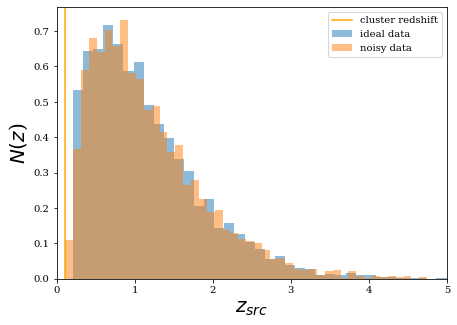

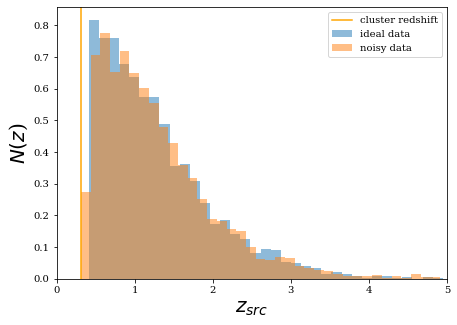

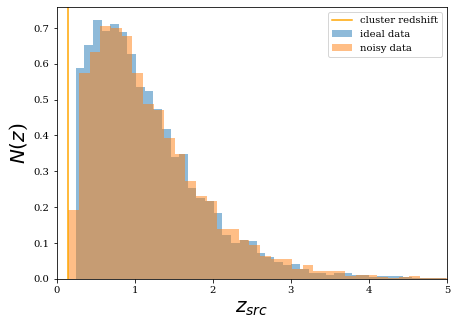

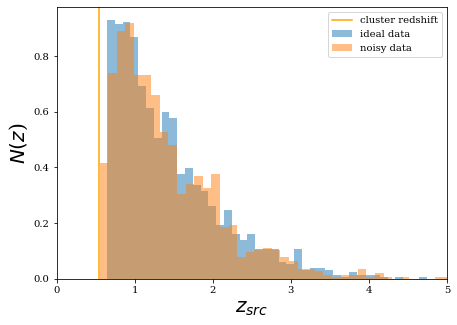

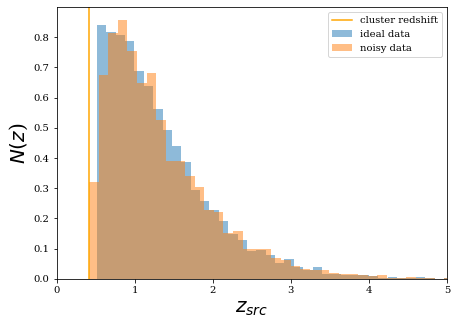

In [10]:
for k in range(num):
    plt.figure(figsize=(7,5))
    plt.hist(ideal_data[k]['z'], density = True, alpha=0.5, bins = 50, label='ideal data')
    plt.hist(noisy_data[k]['z'], alpha=0.5, density = True, bins = 50, label='noisy data')
    plt.axvline(x = cluster_data[k][4], color='orange', label = 'cluster redshift')
    plt.xlabel(r'$z_{src}$', fontsize = 20)
    plt.ylabel(r'$N(z$)', fontsize = 20)
    plt.legend()
    plt.xlim(0,5)
    

In [11]:
gc_object =[]

for k in range(num):
    cluster_ra = cluster_data[k][2]
    cluster_dec = cluster_data[k][3]
    cluster_m = cluster_data[k][0]
    cluster_z = cluster_data[k][4]
    concentration = cluster_data[k][1]
    ngals = int(cluster_data[k][5])
    cluster_id = "CL_ideal"
    gc_object.append( clmm.GalaxyCluster(cluster_id, cluster_ra, cluster_dec,
                                  cluster_z, ideal_data[k]))
    gc_object[k].save('ideal_GC_'+str(k)+'.pkl')

gc_object =[]

for k in range(num):
    cluster_ra = cluster_data[k][2]
    cluster_dec = cluster_data[k][3]
    cluster_m = cluster_data[k][0]
    cluster_z = cluster_data[k][4]
    concentration = cluster_data[k][1]
    ngals = int(cluster_data[k][5])
    cluster_id = "CL_noisy"
    gc_object.append( clmm.GalaxyCluster(cluster_id, cluster_ra, cluster_dec,
                                  cluster_z, noisy_data[k]))
    gc_object[k].save('noisy_GC_'+str(k)+'.pkl')


In [12]:
cl_ideal = []
cl_noisy = []
for k in range(num):
    cl_ideal.append (clmm.GalaxyCluster.load('ideal_GC_'+str(k)+'.pkl'))
    cl_noisy.append (clmm.GalaxyCluster.load('noisy_GC_'+str(k)+'.pkl'))
    

In [13]:
#for k in range(num):
    #plt.figure(figsize=(7,5))
    #plt.hist(cl_ideal[k].galcat['z'], density = True, bins = 50)
    #plt.axvline(x = cluster_z, color='orange', label = 'cluster redshift')
    #plt.xlabel(r'$z_{src}$', fontsize = 20)
    #plt.ylabel(r'$N(z$)', fontsize = 20)
    #plt.legend()
    #plt.xlim(0,5)
    

In [14]:
for k in range(num):
    cl_ideal[k].compute_tangential_and_cross_components(geometry="flat")
    cl_noisy[k].compute_tangential_and_cross_components(geometry="flat")
pass


In [15]:
bin_edges = da.make_bins(0.2, 4, 15, method='evenlog10width')


In [19]:
for k in range(num):
    cluster_z = cluster_data[k][4]
    a = cl_ideal[k].make_radial_profile("Mpc",include_empty_bins=True, bins=bin_edges, cosmo=cosmo, gal_ids_in_bins=True)
    b = cl_noisy[k].make_radial_profile("Mpc",include_empty_bins=True, bins=bin_edges,cosmo=cosmo, gal_ids_in_bins=True)
    #print(np.shape(cl_ideal[k].profile['z']))
    #print(cl_ideal[k].profile['z'])
    mask = cl_ideal[k].profile['z'] < cluster_z
    cl_ideal[k].profile['z'] = np.where(cl_ideal[k].profile['z'] < cluster_z, np.random.uniform(cluster_z,0.6), cl_ideal[k].profile['z'])
    #print(np.shape(cl_noisy[k].profile['z']))
    print(cl_ideal[k].profile['z'])
pass


        z         
------------------
1.3706991541123081
1.5665026758289973
1.0964251445086004
1.0701876719110874
0.8188604062585276
1.2658764084109082
1.3102829279792712
1.0964788324045862
1.1943914590460747
 1.188341977599923
1.1704808698484173
1.1074721404349113
1.1249460709010042
1.1709354360516844
1.1638870698319017
        z         
------------------
1.8823573341421422
1.3499110392677198
0.9975102812957761
1.3501932218184425
1.1429887637257594
1.1779499617788092
1.3248304947596843
1.2504198970201723
1.3643915365689503
1.2850489687931819
1.3446144611188564
 1.280658539333305
1.2165098332936086
1.2581652445785896
 1.292284700632635
        z         
------------------
1.0663702592589321
 1.185696601201808
1.1876688662133248
1.1960687134136443
 1.119007567934232
1.1405164682376723
1.2069545524575511
1.2038059892962818
 1.248933039944226
 1.101988362075777
1.1010138444133801
1.1506118070372446
1.1730048276062943
1.1799322100442586
 1.147984072765244
        z         
------------

/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/galaxycluster.py:298: UserWarning: overwriting profile table.
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/galaxycluster.py:298: UserWarning: overwriting profile table.
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/galaxycluster.py:298: UserWarning: overwriting profile table.
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/galaxycluster.py:298: UserWarning: overwriting profile table.
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/galaxycluster.py:298: UserWarning: overwriting profile table.
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/galaxycluster.py:298: UserWarning: overwriting profile table.
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/galaxycluster.py:298: UserWarning

In [20]:
def model_reduced_tangential_shear_singlez(r, logm, z_src, concentration, cluster_z):
    m = 10.**logm
    gt_model = clmm.compute_reduced_tangential_shear(r,
                                                     m, concentration,
                                                     cluster_z, z_src, cosmo,
                                                     delta_mdef=200,
                                                     halo_profile_model='nfw')    
    return gt_model

In [30]:
def model_reduced_tangential_shear_zdistrib(radius, logm, data, catalog, profile, concentration, cluster_z): 
    m = 10**logm
    gt_model = []
    for i in range(len(radius)):
        
        r = profile['radius'][i]
        galist = profile['gal_id'][i]
        z_list = catalog.galcat['z'][galist]
        shear = clmm.compute_reduced_tangential_shear(r, m, concentration, 
                                                      cluster_z, z_list, cosmo, delta_mdef=200, 
                                                      halo_profile_model='nfw')
        gt_model.append(np.mean(shear))

    return gt_model

In [38]:
gt_model_ideal_singlez = []
gt_model_ideal_zdistrib = []
gt_model_noisy_singlez = []
gt_model_noisy_zdistrib = []
for k in range(num):
    
    cluster_ra = cluster_data[k][2]
    cluster_dec = cluster_data[k][3]
    cluster_m = cluster_data[k][0]
    cluster_z = cluster_data[k][4]
    concentration = cluster_data[k][1]
    ngals = int(cluster_data[k][5])
    logm = np.log10(cluster_m)
    r = cl_ideal[k].profile['radius']
    mask = r < 1.e-11
    r = np.where(r < 1.e-11, np.random.uniform(1.e-11,3), r)
    #print(np.shape(cl_noisy[k].profile))
    gt_model_ideal_singlez.append(model_reduced_tangential_shear_singlez(r, logm,cl_ideal[k].profile['z'],concentration, cluster_z))
    gt_model_ideal_zdistrib.append(model_reduced_tangential_shear_zdistrib(r,logm, ideal_data[k], cl_ideal[k], cl_ideal[k].profile,concentration,cluster_z))
    gt_model_noisy_singlez.append(model_reduced_tangential_shear_singlez(r,logm,cl_noisy[k].profile['z'],concentration, cluster_z ))
    gt_model_noisy_zdistrib.append(model_reduced_tangential_shear_zdistrib(r,logm,noisy_data[k], cl_noisy[k], cl_noisy[k].profile,concentration, cluster_z ))
    

0.21306327099877354
0.2746523954152519
0.31264215539285073
0.4023454893613988
0.4914020926595182
0.6110868769770479
0.7341361246614398
0.898763950182384
1.107251374856024
1.3478301310603393
1.6442735764660676
2.003196403896504
2.438418862476575
2.9892397569325477
3.644040231654602
0.22015332200084228
0.28314092904267313
0.3224034431993772
0.40808086458790466
0.4975691379576771
0.5972002045930417
0.7454552615966314
0.8946514596316762
1.1016736210693039
1.3384023935119396
1.636534447904037
2.0000395868087164
2.4500259038892684
2.9987739303856014
3.652167072795866
0.2152704525275885
0.27096239411183975
0.3433788362527836
0.3957907803091913
0.5012512520417787
0.6065365089510735
0.7399165109659945
0.9037033752039884
1.0969213237549131
1.3384124786708909
1.6425806344287415
2.0022812672848156
2.4538286141713153
2.988232202603339
3.6553894608889497
0.22889881293292957
0.2763627836785447
0.33020461554132063
0.4209607520276776
0.4943583830782579
0.6051782162756318
0.746121255604651
0.90574463215

ValueError: cannot call `vectorize` on size 0 inputs unless `otypes` is set

In [ ]:
for k in range (num):
    cluster_ra = cluster_data[k][2]
    cluster_dec = cluster_data[k][3]
    cluster_m = cluster_data[k][0]
    cluster_z = cluster_data[k][4]
    concentration = cluster_data[k][1]
    ngals = int(cluster_data[k][5])
    logm = np.log10(cluster_m)
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)

    plt.title('ideal data', fontsize=20)
    plt.errorbar(r,cl_ideal[k].profile['gt'],cl_ideal[k].profile['gt_err'],c='k',linestyle='', 
                 marker='o', label=r'ideal data, $M_{input}$ = %.2e Msun' % cluster_m)
    plt.loglog(r,gt_model_ideal_zdistrib[k],'b',  label=r'model w/ zdistrib, $M_{input}$ = %.2e Msun' % cluster_m)
    plt.loglog(r,gt_model_ideal_singlez[k],'-y',  label=r'model w/o zdistrib, $M_{input}$ = %.2e Msun' % cluster_m)
    plt.xlabel('r [Mpc]', fontsize = 20)
    plt.ylabel(r'$g_t$', fontsize = 20)
    plt.xlim(min(cl_ideal[k].profile['radius']), max(cl_ideal[k].profile['radius']))
    plt.legend(fontsize = 15)

    plt.subplot(1,2,2)

    plt.title('noisy data', fontsize=20)
    plt.errorbar(r,cl_noisy[k].profile['gt'],cl_noisy[k].profile['gt_err'],c='k',linestyle='', 
                 marker='o',label=r'noisy data, $M_{input}$ = %.2e Msun' % cluster_m)
    plt.loglog(r,gt_model_noisy_zdistrib[k],'-b', label=r'model w/ zdistrib, $M_{input}$ = %.2e Msun' % cluster_m)
    plt.loglog(r,gt_model_noisy_singlez[k],'-y', label=r'model w/o zdistrib, $M_{input}$ = %.2e Msun' % cluster_m)
    plt.xlabel('r [Mpc]', fontsize = 20)
    plt.ylabel(r'$g_t$', fontsize = 20)
    plt.xlim(min(cl_noisy[k].profile['radius']), max(cl_noisy[k].profile['radius']))
    plt.legend(fontsize = 15)